In [1]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2S
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from pathlib import Path
from glob import glob

In [2]:
model = keras.models.load_model('./cate_vgg16.h5')

In [3]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               4718848   
                                                                 
 dense_5 (Dense)             (None, 9)                 2313      
                                                                 
Total params: 19,435,849
Trainable params: 19,435,849
Non-trainable params: 0
_________________________________________________________________


In [6]:
class_name = ['아리수', '홍로', '후지']

In [15]:
image = Image.open('./huji.jpg')
image = image.resize((220, 220))
image = np.array(image)

In [16]:
image = image.reshape((1, 220, 220, 3))
image.shape

(1, 220, 220, 3)

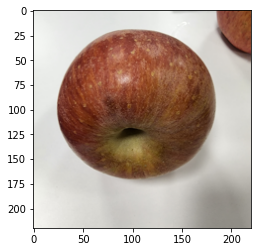

In [17]:
import matplotlib.pyplot as plt
plt.imshow(image[0])

In [18]:
class_name[np.argmax(model.predict(image))]

1/1 [==============================] - 0s 16ms/step


'후지'

In [65]:
get_layer_name = [layer.name for layer in model.layers[0].layers]
get_output = [layer.output for layer in model.layers[0].layers]
print('층 이름: ', get_layer_name)
print('출력 층 이름: ', get_output)

층 이름:  ['input_8', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool']
출력 층 이름:  [<KerasTensor: shape=(None, 220, 220, 3) dtype=float32 (created by layer 'input_8')>, <KerasTensor: shape=(None, 220, 220, 64) dtype=float32 (created by layer 'block1_conv1')>, <KerasTensor: shape=(None, 220, 220, 64) dtype=float32 (created by layer 'block1_conv2')>, <KerasTensor: shape=(None, 110, 110, 64) dtype=float32 (created by layer 'block1_pool')>, <KerasTensor: shape=(None, 110, 110, 128) dtype=float32 (created by layer 'block2_conv1')>, <KerasTensor: shape=(None, 110, 110, 128) dtype=float32 (created by layer 'block2_conv2')>, <KerasTensor: shape=(None, 55, 55, 128) dtype=float32 (created by layer 'block2_pool')>, <KerasTensor: shape=(None, 55, 55, 256) dtype=float32 (cr

In [41]:
model.predict(image)

1/1 [==============================] - 0s 18ms/step


array([[1.1553225e-01, 1.9120221e-01, 6.9326097e-01, 2.2381403e-06,
        4.8116351e-07, 5.2411434e-07, 3.3615945e-07, 1.2487629e-07,
        8.8665774e-07]], dtype=float32)

In [63]:
visual_model.summary()

Model: "model_22"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 vgg16_input (InputLayer)       [(None, 220, 220, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_8 (InputLayer)           [(None, 220, 220, 3  0           []                               
                                )]                                                                
                                                                                                  
Total params: 0
Trainable params: 0
Non-trainable params: 0
__________________________________________________________________________________________________


In [68]:
# 모델 전체에서 output을 가져올 수 있습니다.
visual_model = tf.keras.models.Model(inputs = model.input,
                                     outputs = get_output)

# # 테스트셋의 두 번째 데이터는 '배'입니다.
# test_img = np.expand_dims(image, axis = 0)
# feature_maps = visual_model.predict(image)

# for layer_name, feature_map in zip(get_layer_name, feature_maps):
#     # Dense 층은 제외합니다.
#     if(len(feature_map.shape) == 4):
#         img_size = feature_map.shape[1]
#         features = feature_map.shape[-1]
        
#         # (img_size, img_size)의 feature_map이 features 개수만큼 존재합니다.
#         display_grid = np.zeros((img_size, img_size * features))
        
#         # 각 특징맵을 display_grid 배열에 이어붙입니다.
#         for i in range(features):
#             x = feature_map[0, :, :, i]
#             x -= x.mean(); x /= x.std()
#             x *= 64; x += 128
#             x = np.clip(x, 0, 255).astype('uint8')
#             display_grid[:, i * img_size : (i + 1) * img_size] = x
            
#         plt.figure(figsize = (features, 2 + 1./features))
#         plt.title(layer_name, fontsize = 20)
#         plt.grid(False)
#         plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 220, 220, 3), dtype=tf.float32, name='input_8'), name='input_8', description="created by layer 'input_8'") at layer "block1_conv1". The following previous layers were accessed without issue: []